<a href="https://colab.research.google.com/github/pavitraa0625/ML-LAB/blob/main/ML_LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change the path below to your dataset location
import zipfile
zip_path = "/content/drive/MyDrive/PlantVillage-Dataset.zip"
extract_path = "/content/plantvillage"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Mounted at /content/drive
Dataset extracted to: /content/plantvillage


In [ ]:
import zipfile
import os
import shutil

zip_path = "/content/drive/MyDrive/PlantVillage-Dataset.zip"
extract_path = "/content/plantvillage"

# Create a folder
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    all_files = zip_ref.namelist()

    # Filter only images (avoid metadata like __MACOSX)
    img_files = [f for f in all_files if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Pick first 5000
    img_files = img_files[:5000]

    # Extract only 5000
    for f in img_files:
        zip_ref.extract(f, extract_path)

print("Extracted:", len(img_files), "images")


Extracted: 5000 images


In [ ]:
import cv2
import numpy as np
import os, random

base_path = "/content/plantvillage/PlantVillage-Dataset/data_distribution_for_SVM/train"

data = []
labels = []
class_names = {}

idx = 0
for class_folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, class_folder)
    if os.path.isdir(folder_path):
        class_names[idx] = class_folder
        images = os.listdir(folder_path)
        random.shuffle(images)
        for file in images[:150]:  # ~150 per class → 39 classes ≈ 5850 images
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                data.append(img.flatten())
                labels.append(idx)
        idx += 1

data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
print("Number of classes:", len(class_names))
print("Classes:", class_names)



Data shape: (4863, 12288)
Labels shape: (4863,)
Number of classes: 38
Classes: {0: '0', 1: '20', 2: '16', 3: '27', 4: '22', 5: '28', 6: '30', 7: '13', 8: '2', 9: '32', 10: '10', 11: '18', 12: '36', 13: '31', 14: '1', 15: '11', 16: '9', 17: '3', 18: '8', 19: '24', 20: '26', 21: '19', 22: '37', 23: '23', 24: '34', 25: '21', 26: '17', 27: '12', 28: '35', 29: '25', 30: '6', 31: '4', 32: '5', 33: '29', 34: '7', 35: '15', 36: '33', 37: '14'}


In [ ]:
import numpy as np

def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

print("Entropy of dataset:", entropy(labels))


Entropy of dataset: 5.1716346541860165


In [ ]:
def gini_index(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

print("Gini Index of dataset:", gini_index(labels))


Gini Index of dataset: 0.9714443064668609


In [ ]:
def information_gain(X_column, y):
    parent_entropy = entropy(y)
    values, counts = np.unique(X_column, return_counts=True)
    weighted_entropy = sum((counts[i]/np.sum(counts)) * entropy(y[X_column==values[i]])
                           for i in range(len(values)))
    return parent_entropy - weighted_entropy

def best_split(X, y):
    best_gain = -1
    best_attr = None
    for col in range(X.shape[1]):
        gain = information_gain(X[:, col], y)
        if gain > best_gain:
            best_gain = gain
            best_attr = col
    return best_attr

# Example: small subset (to avoid heavy computation)
X_small = data[:500, :50]
y_small = labels[:500]

best_feature = best_split(X_small, y_small)
print("Best feature index (root node):", best_feature)


Best feature index (root node): 32


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

print("Decision Tree Accuracy:", clf.score(X_test, y_test))


Decision Tree Accuracy: 0.12949640287769784


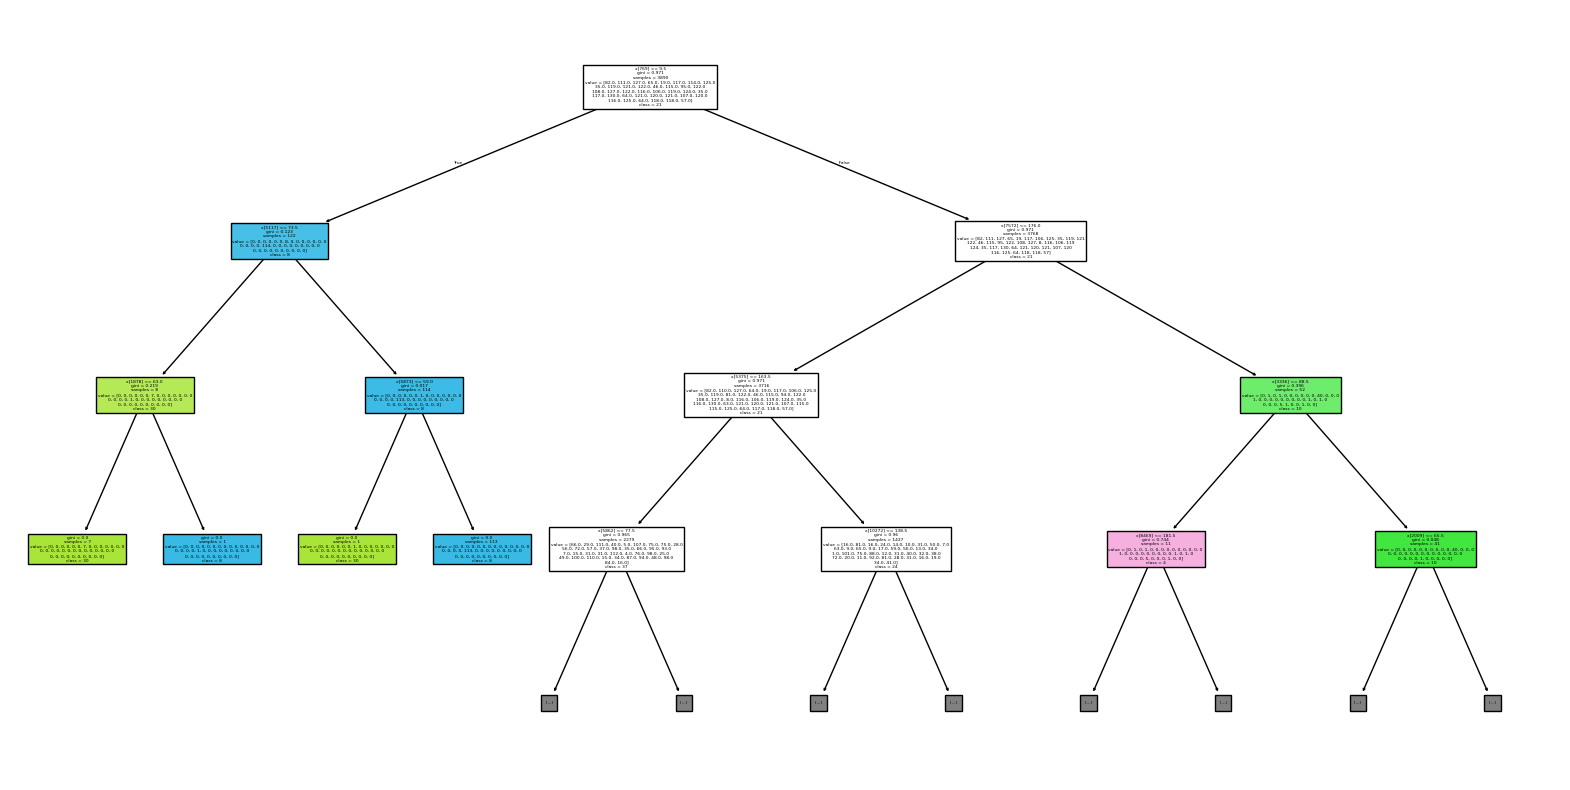

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, class_names=[str(c) for c in class_names.values()], max_depth=3)
plt.show()


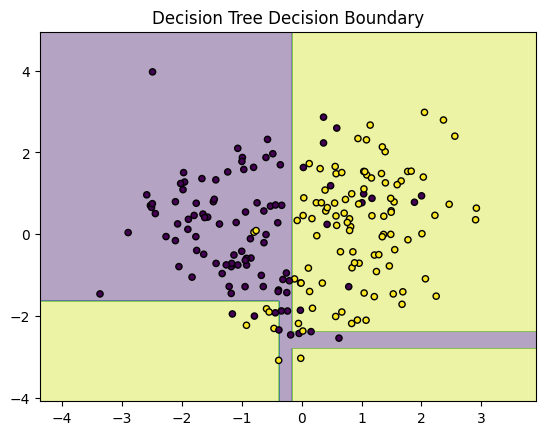

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Generate toy 2D dataset for visualization
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=42
)

# Train decision tree
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
plt.title("Decision Tree Decision Boundary")
plt.show()

